In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# EULER INTEGRATION FUNCTIONS:
def fs_evo_eq(fs,pis,qs,l,lci):
    dfsdt = [0.0,]
    for i in range(len(fs)-1):
        site_i = i+1
        dfdt = fs[0]*((1-l)*pis[i]+l*fs[site_i]) - fs[site_i]/qs[i] - lci*fs[site_i]*(sum(fs[1:site_i])+sum(fs[site_i+1:]))
        dfsdt.append(dfdt)
    dfsdt[0] = -1*sum(dfsdt[1:])
    return dfsdt

def ci1(x, thresh):
    ci = 1.0 if x >= thresh else 0.0
    return ci

def fs_evo_eq_ci1(fs,pis,qs,l,cithresh):
    dfsdt = [0.0,]
    for i in range(len(fs)-1):
        site_i = i+1
        others_com = sum(fs[1:site_i])+sum(fs[site_i+1:])
        dfdt = fs[0]*((1-l)*pis[i]+l*fs[site_i]) - fs[site_i]/qs[i] - fs[site_i]*ci1(others_com,cithresh) *others_com
        dfsdt.append(dfdt)
    dfsdt[0] = -1*sum(dfsdt[1:])
    return dfsdt

def fs_evo_eq_ci1_indv(fs,pis,qs,l,cithresh):
    dfsdt = [0.0,]
    Nsites = len(fs)-1
    for i in range(len(fs)-1):
        site_i = i+1
        others = [j for j in range(1,Nsites+1) if j != site_i]
        dfdt = fs[0]*((1-l)*pis[i]+l*fs[site_i]) - fs[site_i]/qs[i]
        for j in others:
            # dfdt -= (1/(Nsites-1))*fs[site_i]*ci1(fs[j],cithresh)
            dfdt -= fs[site_i]*ci1(fs[j],cithresh)*fs[j]
        dfsdt.append(dfdt)
    dfsdt[0] = -1*sum(dfsdt[1:])
    return dfsdt

In [3]:
def sols_from_intEvo(pis, qs, l, lci, fs0, evofunc, max_time=2000):
    fs = fs0
    dt = 1
    for _ in range(max_time):
        dfsdt = evofunc(fs,pis,qs,l,lci)
        fs = [f+dfdt*dt for f,dfdt in zip(fs,dfsdt)]
    return fs

def get_time_evo_int(pis, qs, l, lci, fs0, max_time=2000):
    fs = fs0
    dt = 1
    fs_evo = [[fs0[0], ], [fs0[1], ], [fs0[2], ]]
    for _ in range(max_time):
        dfsdt = fs_evo_eq(fs,pis,qs,l,lci)
        fs = [f+dfdt*dt for f,dfdt in zip(fs,dfsdt)]
        for k in range(len(fs0)):
            fs_evo[k].append(fs[k])
    return fs_evo

In [47]:
pis, qs, l = [0.1, 0.1], [9.0, 10.0], 0.5
# lci = 0.1
lci = l
fs0 = [1.0, 0.0, 0.0]
fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq)
print(fs)

lci = 0.5 # ci as step function, lci indicates threshold
fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1)
print(fs)

# lci = 0.1
# fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1_indv)
# print(fs)

[0.19926167289366326, 0.024946617769391336, 0.7757917093369451]
[0.17805247737578334, 0.010682941995322154, 0.8112645806288938]


In [32]:
lci = 0.25
fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1_indv, max_time=4)
print(fs)

[0.4938075897959533, 0.2508942672127915, 0.2552981429912552]


### 3 sites test

In [41]:
pis, qs, l = [0.1, 0.1, 0.1], [8.0, 9.0, 10.0], 0.5
lci = l
fs0 = [1.0, 0.0, 0.0, 0.0]
# fs0 = [0.0, 0.34, 0.33, 0.33]
# fs0 = [0.0, 0.5, 0.25, 0.25]
fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq)
print(fs)

lci = 0.5 # ci as step function, lci indicates threshold
fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1)
print(fs)

lci = 0.2
fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1_indv)
print(fs)

[0.2290396055168012, 0.03006331407996537, 0.03125150212326688, 0.7096455782799659]
[0.17780360803274153, 0.010486071117619402, 0.010662978132785246, 0.8010473427168537]
[0.177796984128598, 0.010622608740317063, 0.010801877050384325, 0.8007785300807004]


In [22]:
lci = 0.5
fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1, max_time=1)
print(fs)

[0.7666, 0.0816, 0.07590000000000002, 0.07590000000000002]


In [117]:
fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1, max_time=1)
print(fs)

[0.7666, 0.0816, 0.07590000000000002, 0.07590000000000002]


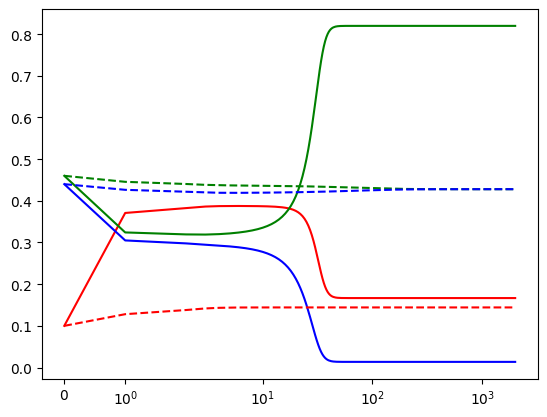

In [33]:
fs0 = [0.1, 0.46, 0.44]

fs_evo = get_time_evo_int(pis, qs, l, lci, fs0)
fig, ax = plt.subplots()
ax.set(xscale='symlog')
iters = list(range(len(fs_evo[0])))
ax.plot(iters, fs_evo[0], color='r')
ax.plot(iters, fs_evo[1], color='g')
ax.plot(iters, fs_evo[2], color='b')

fs_evo = get_time_evo_int(pis, qs, l, 0.0, fs0)
ax.set(xscale='symlog')
iters = list(range(len(fs_evo[0])))
ax.plot(iters, fs_evo[0], color='r', ls='--')
ax.plot(iters, fs_evo[1], color='g', ls='--')
ax.plot(iters, fs_evo[2], color='b', ls='--')


# Solutions for various lambda

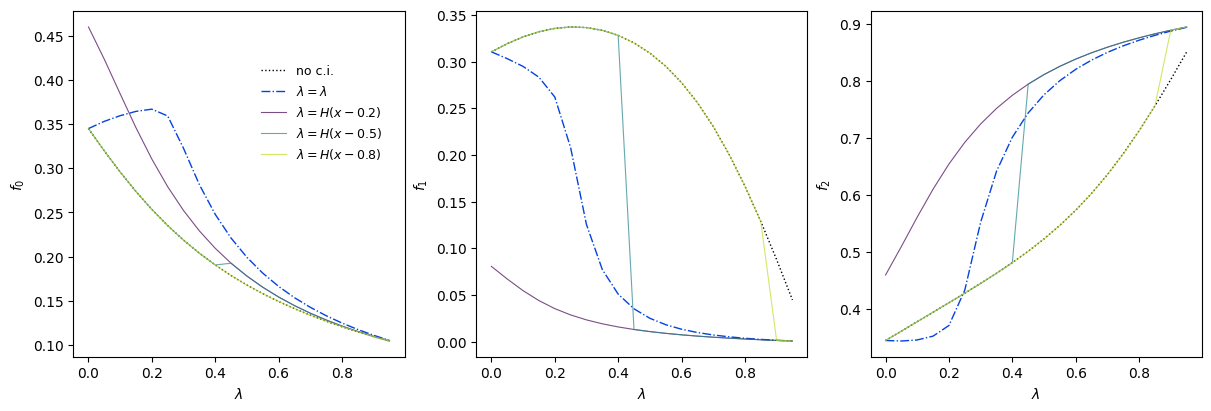

In [52]:
ls = np.arange(0.0, 1.0, 0.05)
pis, qs = [0.1, 0.1], [9.0, 10.0]
fs0 = [1.0, 0.0, 0.0]



fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for i in range(3):
    ax[i].set(xlabel='$\lambda$', ylabel=f'$f_{i}$')

# no cross inhibition:
fs_evo = [[], [], []]
lci = 0.0
for l in ls:
    fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq)
    for i in range(3):
        fs_evo[i].append(fs[i])
for i in range(3):
    label='no c.i.' if i==0 else '_nolabel_'
    ax[i].plot(ls, fs_evo[i], ls=':', color='k', lw=1.0, label=label)

# cross inhibition = interdependence
fs_evo = [[], [], []]
for l in ls:
    lci = l
    fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq)
    for i in range(3):
        fs_evo[i].append(fs[i])
for i in range(3):
    label=r"$\lambda' = \lambda$" if i==0 else '_nolabel_'
    ax[i].plot(ls, fs_evo[i], ls='-.', color='xkcd:blue', lw=1.0, label=label)

# cross inhibition = step function
lcis = [0.2, 0.5, 0.8]
colors = plt.cm.viridis(np.linspace(0.0,0.9,len(lcis)))
for lci,c in zip(lcis,colors): # threshold of the step function
    fs_evo = [[], [], []]
    for l in ls:
        fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1)
        for i in range(3):
            fs_evo[i].append(fs[i])
    for i in range(3):
        label=rf'$\lambda = H(x-{lci})$' if i==0 else '_nolabel_'
        ax[i].plot(ls, fs_evo[i], label=label, lw=0.8, alpha=0.7, color=c)

# each state individually inhibits
# fs_evo = [[], [], []]
# lci = 0.1 # threshold of the step function
# for l in ls:
#     fs = sols_from_intEvo(pis, qs, l, lci, fs0, fs_evo_eq_ci1_indv)
#     for i in range(3):
#         fs_evo[i].append(fs[i])
# for i in range(3):
#     ax[i].plot(ls, fs_evo[i])

ax[0].legend(loc=(0.55,0.55), fontsize=9, frameon=False)